In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
from sklearn.datasets import load_iris

iris=load_iris()
X_1=iris.data[50:,[0,2]]
y_1=iris.target[50:]

from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

from sklearn.svm import SVC
svc_1=SVC(kernel='linear',C=1.0)
svc_1.fit(X_1_train,y_1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
from sklearn.metrics import confusion_matrix
cm_1=confusion_matrix(y_1_test,svc_1.predict(X_1_test))
cm_1

array([[13,  2],
       [ 1, 14]])

In [6]:
def plot_cm(confmat):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.title('predicted label')
    plt.ylabel('true label')
    plt.tight_layout() # ラベルが重ならないように自動調整
    plt.show()

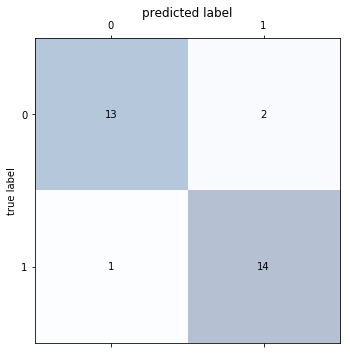

In [7]:
plot_cm(cm_1)

In [8]:
from sklearn import metrics
metrics.accuracy_score(y_1_test,svc_1.predict(X_1_test))

0.9

In [9]:
metrics.recall_score(y_1_test,svc_1.predict(X_1_test))

0.8666666666666667

In [11]:
metrics.precision_score(y_1_test,svc_1.predict(X_1_test))

0.9285714285714286

In [12]:
metrics.f1_score(y_1_test,svc_1.predict(X_1_test))

0.896551724137931

In [13]:
iris = load_iris()
X_2 = iris.data[:, [0, 2]]
y_2 = iris.target

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

from sklearn.svm import SVC
svc_2=SVC(kernel='linear',C=1.0)
svc_2.fit(X_2_train,y_2_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
cm_2 = confusion_matrix(y_2_test, svc_2.predict(X_2_test))
cm_2

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 10]])

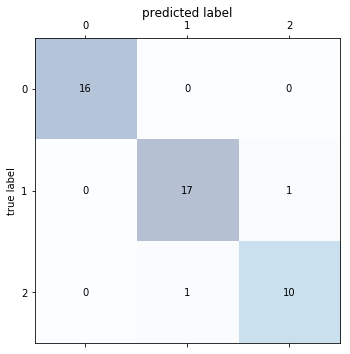

In [15]:
plot_cm(cm_2)

In [23]:
from pandas import DataFrame as df
from sklearn.datasets import load_boston
boston = load_boston()

# DataFrameを生成
df_data = pd.DataFrame(boston.data, columns=boston.feature_names)
df_target = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([df_data, df_target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
X_3=df.loc[:,['LSTAT','RM']].values
y_3=df.loc[:,['MEDV']].values

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [30]:
from sklearn.model_selection import KFold
kf_3=KFold(n_splits=5,shuffle=True,random_state=0)

In [31]:
from sklearn.model_selection import cross_val_score
score_3=cross_val_score(lr,X_3,y_3,cv=kf_3)
score_3

array([0.54090848, 0.70922084, 0.57458547, 0.55307476, 0.738459  ])

In [33]:
score_3.mean()

0.6232497111077301

In [34]:
score_3.std()

0.08335109518518222

In [35]:
from sklearn.datasets import load_iris
iris = load_iris()
X_4 = iris.data[:,[2,3]]
y_4 = iris.target

In [36]:
from sklearn.svm import SVC
svc_4=SVC(kernel='rbf',gamma=0.1,C=1.0)

In [39]:
from sklearn.model_selection import StratifiedKFold
kf_4=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

In [40]:
from sklearn.model_selection import cross_val_score
scores_4=cross_val_score(svc_4,X_4,y_4,cv=kf_4)

In [41]:
scores_4.mean()

0.96

In [42]:
scores_4.std()

0.013333333333333332

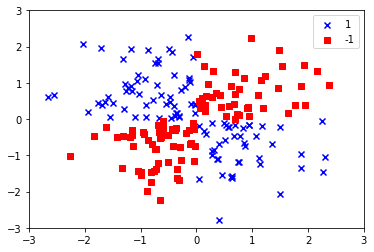

In [43]:
# XORのデータの作成
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# データのプロット
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best') # 右上に凡例を出力
plt.show()

In [44]:
X_xor_train, X_xor_test, y_xor_train, y_xor_test = train_test_split(X_xor, y_xor, test_size=0.3, random_state=0)


In [45]:
param_grid = {'C': [0.1, 1.0, 10, 100, 1000, 10000],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}

In [47]:
from sklearn.model_selection import StratifiedKFold
kf_5=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

gs_svc=GridSearchCV(SVC(),param_grid,cv=kf_5)

In [50]:
gs_svc.fit(X_xor_train,y_xor_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1.0, 10, 100, 1000, 10000], 'gamma': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
gs_svc.best_params_

{'C': 1000, 'gamma': 0.1}

In [52]:
gs_svc.best_score_

0.9714285714285714

In [54]:
gs_svc.score(X_xor_test,y_xor_test)

0.9666666666666667

In [55]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
    plt.show()

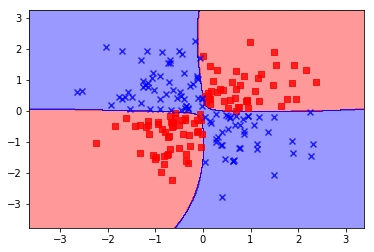

In [56]:
plot_decision_regions(X_xor,y_xor,gs_svc)